<a href="https://colab.research.google.com/github/RadhavaramHarika/Dissertations/blob/master/Dissertations_CTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os, string, csv, io ,re
from google.colab import drive,files
from textblob import TextBlob,Word
import pandas as panda
import numpy as nump
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.summarization.textcleaner import clean_text_by_word
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from gensim import corpora


#Using functions to read data from csv file
def readingDissertations():
    drive.mount('/content/gdrive')
    filenames = os.listdir('/content/gdrive/My Drive/Colab Notebooks/dissertations_txt')
    print(filenames)
    os.chdir('/content/gdrive/My Drive/Colab Notebooks/dissertations_txt')
    dissertations = []
    pattern = "chapter\s1(.*?)chapter\s2"
    for i in range(len(filenames)):
        disst_txtfile = open(filenames[i],'r')
        disst_content = disst_txtfile.read().replace('\xa0','')
        disst_txtfile.close()
        if '\r\n' in disst_content:
            disst = re.sub(r"\r\n", " ", disst_content.lower())
        else:
            disst = re.sub(r"\n", " ", disst_content.lower())
        dissertations.append(disst) 
    return dissertations

def removePunctuations(dissertationsList):
    disst_withNoPunct = []
    transltr_table = str.maketrans('','',string.punctuation)
    for each in dissertationsList:
        each_noPunct= re.sub(r"\W"," ",each.translate(transltr_table))
        disst_withNoPunct.append(each_noPunct)
    return disst_withNoPunct

def extractChapt1(disstList):
    disst_chap1 = []
    for each in disstList:
        #if each.count("chapter 1 introduction") > 1:
         #   start = each.find("chapter introduction",each.find("chapter 1 introduction")+1) + len("chapter 1")
        #else:
        start = each.find("chapter 1 introduction") + len("chapter 1")
        end = each.find("chapter 2")
        chap_1 = each[start:end]
        disst_chap1.append(chap_1)
    return disst_chap1

def removingNumbers(disstList):
  disst_noNum = []
  for each in disstList:
    each = re.sub(r"\d+","",each)
    disst_noNum.append(each)
  return disst_noNum

def disst_tokens(disstList):
    disst_tokens = []
    for each in disstList:
        tblob = TextBlob(each)
        disst_tokens.append([Word(each) for each in tblob.words])
    return disst_tokens

def tokenswithGensim(disstList):
  gensimTokens = []
  for each in disstList:
    tokens = clean_text_by_word(each)
    print(tokens)
    gensimTokens.append(tokens)
  return gensimTokens

def removeStopWords(disstTokenList):
  stop_words = stopwords.words("english")
  disst_withnostops = []
  for each_disst in disstTokenList:
    disst_withnostops.append([tokens for tokens in each_disst
                  if tokens not in stop_words])
  return disst_withnostops


def stemming(disstTokenList):
  disst_with_stemming = []
  lancaster = LancasterStemmer()
  for each_disst in disstTokenList:
    disst_with_stemming.append([lancaster.stem(tokens) for tokens in each_disst])
  return disst_with_stemming

def uploadToCSV(disstList):
  
  datafrm = panda.DataFrame({"ID": [i+1 for i in range(len(disstList))],
                            "Dissertations": disstList,
                            "Removed Punctuations":removePunctuations(readingDissertations()),
                            "Chapter 1":extractChapt1(removePunctuations(readingDissertations())),
                            "Removed Numbers":removingNumbers(extractChapt1(removePunctuations(readingDissertations()))),
                            "Tokens":disst_tokens(removingNumbers(extractChapt1(removePunctuations(readingDissertations())))),
                            "Removed stopwords":removeStopWords(disst_tokens(removingNumbers(extractChapt1(removePunctuations(readingDissertations()))))),
                            "Stemmed":stemming(removeStopWords(disst_tokens(removingNumbers(extractChapt1(removePunctuations(readingDissertations()))))))})

  datafrm.to_csv("/content/gdrive/My Drive/Colab Notebooks/PreprocessedDissertation.csv")

  #drive.mount('/content/gdrive')
  #file_list = os.listdir('/content/gdrive/My Drive/Colab Notebooks')
  #os.chdir('/content/gdrive/My Drive/Colab Notebooks')
  #if 'PreprocessedDissertation.csv' not in file_list:
   # uploaded = files.upload() 
    #data = io.StringIO(uploaded['PreprocessedDissertation.csv'].decode('utf-8'))
  return datafrm
            
#stemming(removeStopWords(disst_tokens(removingNumbers(extractChapt1(removePunctuations(readingDissertations()))))))
#uploadToCSV(readingDissertations())


#tokenswithGensim(extractChapt1(removePunctuations(readingDissertations())))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as panda

file_path = "https://raw.githubusercontent.com/RadhavaramHarika/Dissertations/master/text_preprocessing_data_bhavya.csv?token=AF45Y4FBACDXVKFBWEX27Q26XJNNQ"
data = panda.read_csv(file_path, usecols = [1],names=['Chapter_1'],skiprows=1)
data

,Chapter_1
0,1 CHAPTER 1 INTRODUCTION Problem Statement...
1,1 CHAPTER 1 INTRODUCTION Purpose of Study The...
2,1 CHAPTER 1 INTRODUCTION Introduction and Back...
3,1 CHAPTER 1 INTRODUCTION AND PROBLEM STATEMENT...
4,1 CHAPTER 1 INTRODUCTION 1.1 Introduction...
5,CHAPTER I INTRODUCTION AND RESEARCH QUESTIO...
6,1 CHAPTER 1 INTRODUCTION Imagine an era when l...
7,1 CHAPTER 1 INTRODUCTION Background The liter...
8,CHAPTER 1 INTRODUCTION When I first began this...
9,1 CHAPTER 1 INTRODUCTION This chapter presen...


In [ ]:
import re
import numpy as nump
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plot
%matplotlib inline

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Initialize spacy 'en' model
nlp = spacy.load('en', disable=['parser', 'ner'])

def extractChapt1(disstList):
  disst_chap1 = []
  for each in disstList:
    if '\r\n' in each:
        each = re.sub(r"\r\n", " ", each.lower())
    else:
        each = re.sub(r"\n", " ", each.lower())
    start = each.lower().find("chapter 1 introduction") + len("chapter 1 introduction")
    chap_1 = each[start:]
    disst_chap1.append(chap_1)
  return disst_chap1

def tokenization(disstList):
    for sentence in disstList:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        
def stopwords_removal(disstList):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in disstList]

def build_bigrams_model(disstList):
  bigram = gensim.models.Phrases(disstList, min_count=5, threshold=100)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  return (bigram,bigram_mod)

def build_trigrams_model(disstList,bigrms):
  trigram = gensim.models.Phrases(bigrms[disstList], threshold=100)  
  trigram_mod = gensim.models.phrases.Phraser(trigram)
  return trigram_mod

def disst_bigrams(disstList,model):
  return [model[doc] for doc in disstList]

def disst_trigrams(disstList,bgrm_mod,tgrm_mod):
  return [tgrm_mod[bgrm_mod[doc]] for doc in disstList]

def disst_lemmatization(disstList, allowed_pos=['NN', 'NNP', 'VBG']):
    disst_lemmas = []
    for tokens in disstList:
        doc = nlp(" ".join(tokens)) 
        disst_lemmas.append([token.lemma_ for token in doc if token.tag_ in allowed_pos])
        #disst_lemmas.append([token.lemma_ for token in doc])
    return disst_lemmas

data["Chapter_1"] = extractChapt1(data["Chapter_1"])

data["Tokenized"] = list(tokenization(data["Chapter_1"]))

data["No_Stopwords"] = stopwords_removal(data["Tokenized"])


bi_grams_model = build_bigrams_model(data["Tokenized"])

tri_gram_model = build_trigrams_model(data["No_Stopwords"],bi_grams_model[0])

disst_bigram_words = disst_bigrams(data["No_Stopwords"],bi_grams_model[1])
data["Bigrams"] = disst_bigram_words

disst_trigram_words = disst_trigrams(data["No_Stopwords"],bi_grams_model[1],tri_gram_model)

data["Trigrams"] = disst_trigram_words
print(disst_trigram_words)

#lemmatized_dissertations = disst_lemmatization(disst_trigram_words, allowed_pos=['NOUN', 'ADJ', 'VERB', 'ADV'])
lemmatized_dissertations = disst_lemmatization(disst_trigram_words, allowed_pos=['NN', 'NNP', 'VBG'])

data["Lemmatized"] = lemmatized_dissertations


print(lemmatized_dissertations)

     |████████████████████████████████| 1.6MB 9.2MB/s 
     |████████████████████████████████| 552kB 42.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=bb502eababa8bdac4ea5bd6aac04eb8313c1f04cf644f32f80cce8bcaaf312de
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=c9d707d22f5ce7fe0b819383ec74bc2337e3fef5cc0bec78bea8aa7cf7b6ce4d
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[['uction', 'problem_statement', 'context', 'quality_cataloging', 'concept', 'whose', 'meaning', 'often', 'assumed', 'universally', 'understood', 'catalogers', 'really', 'perceive', 'concept', 'way', 'cataloger', 

In [ ]:
!pip install tomotopy

import tomotopy as tmtpy
from tomotopy.utils import Corpus

#corpus_tmtpy = Corpus(tokenizer = tmtpy.utils.SimpleTokenizer(stemmer=None),batch_size = 10, stopwords = stop_words)
corpus_tmtpy = Corpus(tokenizer = None,batch_size = 10, stopwords = None)
#print(" ".join([" ".join(each_doc) for each_doc in lemmatized_dissertations]))
words_list = []
for each in lemmatized_dissertations:
  corpus_tmtpy.add_doc( words=each,raw=None,user_data=None)
#print(words_list)
#corpus_tmtpy.add_doc( words=words_list,raw=None,user_data=None)
print(corpus_tmtpy.save("dissert_corpus"))
print(corpus_tmtpy.load("dissert_corpus"))

     |████████████████████████████████| 12.5MB 5.7MB/s 
     |████████████████████████████████| 92kB 10.0MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-5.0.0-cp36-none-any.whl size=18684 sha256=97f1d1ff6edbe573db6256e7fe676cdfd15e13c9940fc641fdf787b4313ce410
  Stored in directory: /root/.cache/pip/wheels/01/7e/a9/b982d0fea22b7e4ae5619de949570cde5ad55420cec16e86a5
Successfully built py-cpuinfo
None


In [ ]:
from gensim.models import TfidfModel

from tomotopy import CTModel,TermWeight

'''
model = TfidfModel(corpus) 
vector = model[corpus]  

print(model)
print(vector)'''


ctm_model = CTModel(tw=TermWeight.IDF , min_cf = 5 , min_df = 4,rm_top = 1,k = 10)
print(len(ctm_model.docs))

ctm_model.num_beta_sample = 15
ctm_model.num_tmn_sample = 10


for each in lemmatized_dissertations:
  ctm_model.add_doc(each)


ctm_model.train(2000)
print("Model score/perplexity:",ctm_model.perplexity)


print('Number of documnets/dissertations:', len(ctm_model.docs), '\n total Vocabulary size:', ctm_model.num_vocabs, '\n Number of total words:', ctm_model.num_words)
print('\nRemoved top words:', ctm_model.removed_top_words)

print(len(ctm_model.docs))

#ctm_model.train(ctm_model.num_words)

print(len(ctm_model.docs))

extractor = tmtpy.label.PMIExtractor(min_cf=5, min_df=4, max_len=5, max_cand=10000)
cands = extractor.extract(ctm_model)
print(cands)
labeler = tmtpy.label.FoRelevance(ctm_model, cands, min_df=4, smoothing=1e-2, mu=0.25)

labels_scores = []
topic_words = []
for k in range(ctm_model.k):
  labels_scores.append([(label,score) for label, score in labeler.get_topic_labels(k,top_n=5)])
  print('\n'+', '.join([label for label, score in labeler.get_topic_labels(k,top_n=5)]),'\n')
  topic_words.append([(word,prob) for word, prob in ctm_model.get_topic_words(k, top_n=10)])
  for word, prob in ctm_model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')

  print("Correlation with other topics:",ctm_model.get_correlations(k))

print(labels_scores)
print(topic_words)


0
Model score/perplexity: 6.528309867235244e-05
Number of documnets/dissertations: 10 
 total Vocabulary size: 193 
 Number of total words: 4259

Removed top words: ['information']
10
10
[tomotopy.label.Candidate(words=["group","research","project"], name="", score=6.296939), tomotopy.label.Candidate(words=["information","seek","group"], name="", score=4.607840), tomotopy.label.Candidate(words=["significance","study"], name="", score=2.783369), tomotopy.label.Candidate(words=["purpose","study"], name="", score=2.195582), tomotopy.label.Candidate(words=["information","seeking"], name="", score=2.039324), tomotopy.label.Candidate(words=["information","seek"], name="", score=1.998166), tomotopy.label.Candidate(words=["information","science"], name="", score=1.857003), tomotopy.label.Candidate(words=["follow","research"], name="", score=1.801433), tomotopy.label.Candidate(words=["seek","behavior"], name="", score=1.647756), tomotopy.label.Candidate(words=["research","question"], name="", s

In [ ]:
model_list = []
perplexities = []
for i in range(2,20,2):
  model = CTModel(tw=TermWeight.IDF , min_cf = 5 , min_df = 4,rm_top = 1,k = i)
  model.num_beta_sample = 15
  model.num_tmn_sample = 10

  for each in lemmatized_dissertations:
    model.add_doc(each)
  model.train(2000)
  print(model.perplexity)
  model_list.append(model)
  perplexities.append(model.perplexity)



0.00010634221159948359
8.38461283446639e-05
7.509596445072383e-05
6.947162669558715e-05
6.729343908754288e-05
0.00019599521897533146
6.310147896136312e-05
0.00014596685715680084
5.941011451151076e-05


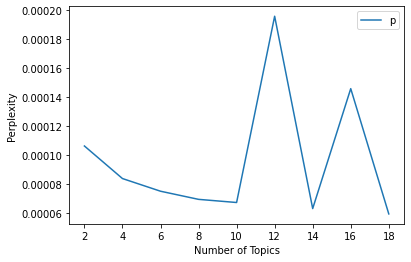

In [ ]:
x = range(2, 20, 2)
plot.plot(x, perplexities)
plot.xlabel("Number of Topics")
plot.ylabel("Perplexity")
plot.legend(("perplexities"), loc='best')
plot.show()

In [ ]:
min_perplexity = min(perplexities)
optimal_ctm_model = model_list[perplexities.index(min_perplexity)] 
print("Number of topics considered for optimal topic modeling:",optimal_ctm_model.k)


Number of topics considered for optimal topic modeling: 18


In [ ]:
extractor = tmtpy.label.PMIExtractor(min_cf=5, min_df=4, max_len=5, max_cand=10000)
cands = extractor.extract(optimal_ctm_model)
print(cands)
labeler = tmtpy.label.FoRelevance(optimal_ctm_model, cands, min_df=4, smoothing=1e-2, mu=0.25)
correlations = []
topics = []
topic_words = []
label_scores = []
for k in range(optimal_ctm_model.k):
  topics.append(labeler.get_topic_labels(k,top_n=5))
  label_scores.append([{label:score} for label, score in labeler.get_topic_labels(k,top_n=5)])
  print('\n'+', '.join([label for label, score in labeler.get_topic_labels(k,top_n=5)]),'\n')
  topic_words.append(optimal_ctm_model.get_topic_words(k,top_n =10))
  for word, prob in optimal_ctm_model.get_topic_words(k,top_n =10):
    print(word, prob, sep='\t')
  correlations.append(optimal_ctm_model.get_correlations(k))
  print("Correlation with other topics:",optimal_ctm_model.get_correlations(k))

print(topics)
print(label_scores)
print(topic_words)

[tomotopy.label.Candidate(words=["group","research","project"], name="", score=6.296939), tomotopy.label.Candidate(words=["information","seek","group"], name="", score=4.607840), tomotopy.label.Candidate(words=["significance","study"], name="", score=2.783369), tomotopy.label.Candidate(words=["purpose","study"], name="", score=2.195582), tomotopy.label.Candidate(words=["information","seeking"], name="", score=2.039324), tomotopy.label.Candidate(words=["information","seek"], name="", score=1.998166), tomotopy.label.Candidate(words=["information","science"], name="", score=1.857003), tomotopy.label.Candidate(words=["follow","research"], name="", score=1.801433), tomotopy.label.Candidate(words=["seek","behavior"], name="", score=1.647756), tomotopy.label.Candidate(words=["research","question"], name="", score=1.413667), tomotopy.label.Candidate(words=["access","information"], name="", score=1.094863), tomotopy.label.Candidate(words=["context","study"], name="", score=0.791588), tomotopy.l

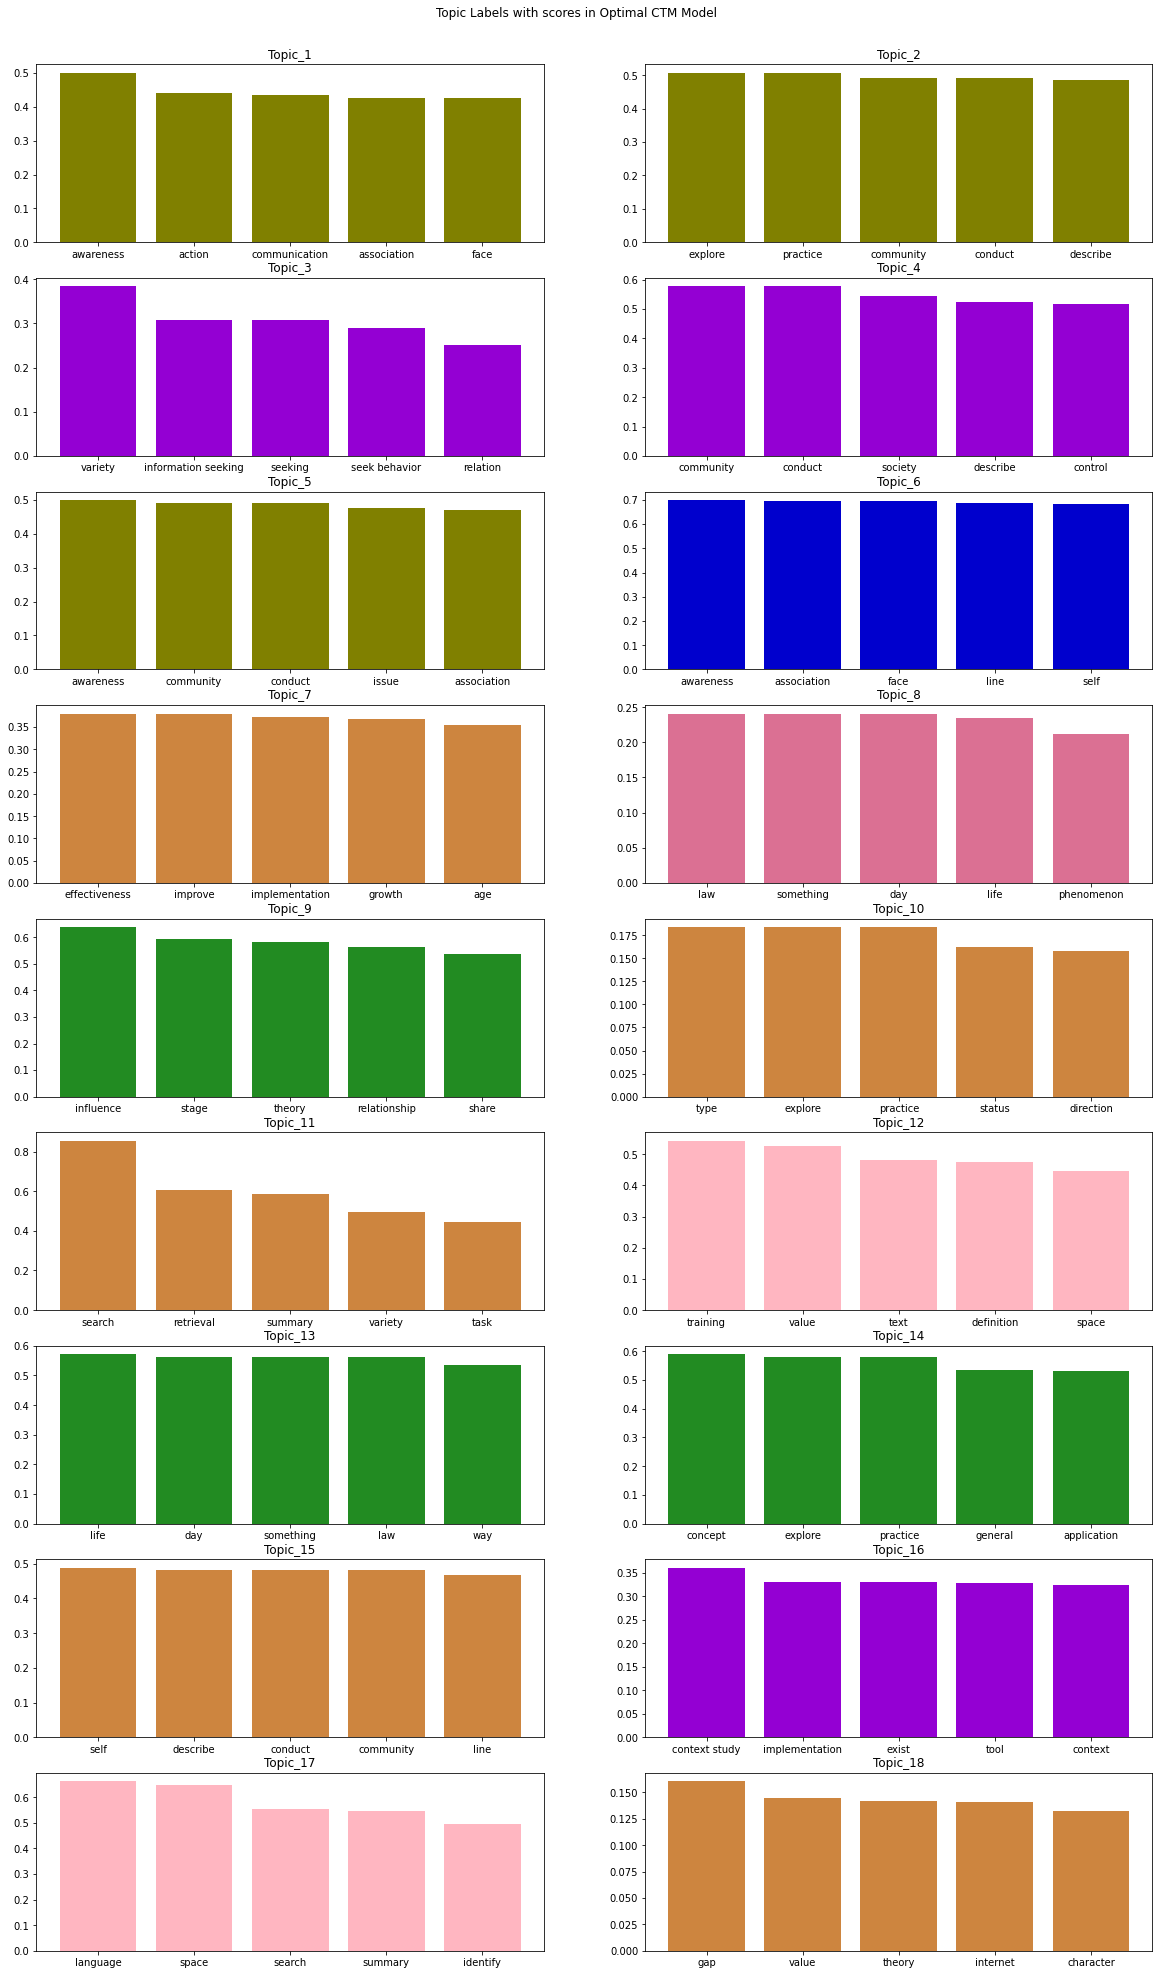

In [ ]:
import random
num_topics = optimal_ctm_model.k
rows = num_topics if num_topics // 2 == 0 else num_topics+1
axis = []
fig, axis = plot.subplots(rows//2, 2,figsize=(20,40),constrained_layout=True)
colors = ['darkviolet','peru','mediumblue','forestgreen','lightpink','olive','thistle','tan','lightseagreen','palevioletred']
for i in range(rows//2):
  x0 = [each[0] for each in topics[i+i]]
  y0 = [each[1] for each in topics[i+i]]
  axis[i,0].bar(x0,y0,color = colors[random.randint(0,9)])
  axis[i,0].set_title("Topic_"+str(i+i+1))
  x1 = [each[0] for each in topics[i+i+1]]
  y1 = [each[1] for each in topics[i+i+1]]
  axis[i,1].bar(x1,y1,color = colors[random.randint(0,9)]) 
  axis[i,1].set_title("Topic_"+str(i+i+2))

fig.suptitle("Topic Labels with scores in Optimal CTM Model",y = 0.8)
fig.subplots_adjust(top=0.78)
plot.savefig("Topic_Label_scores.png")
files.download("Topic_Label_scores.png")



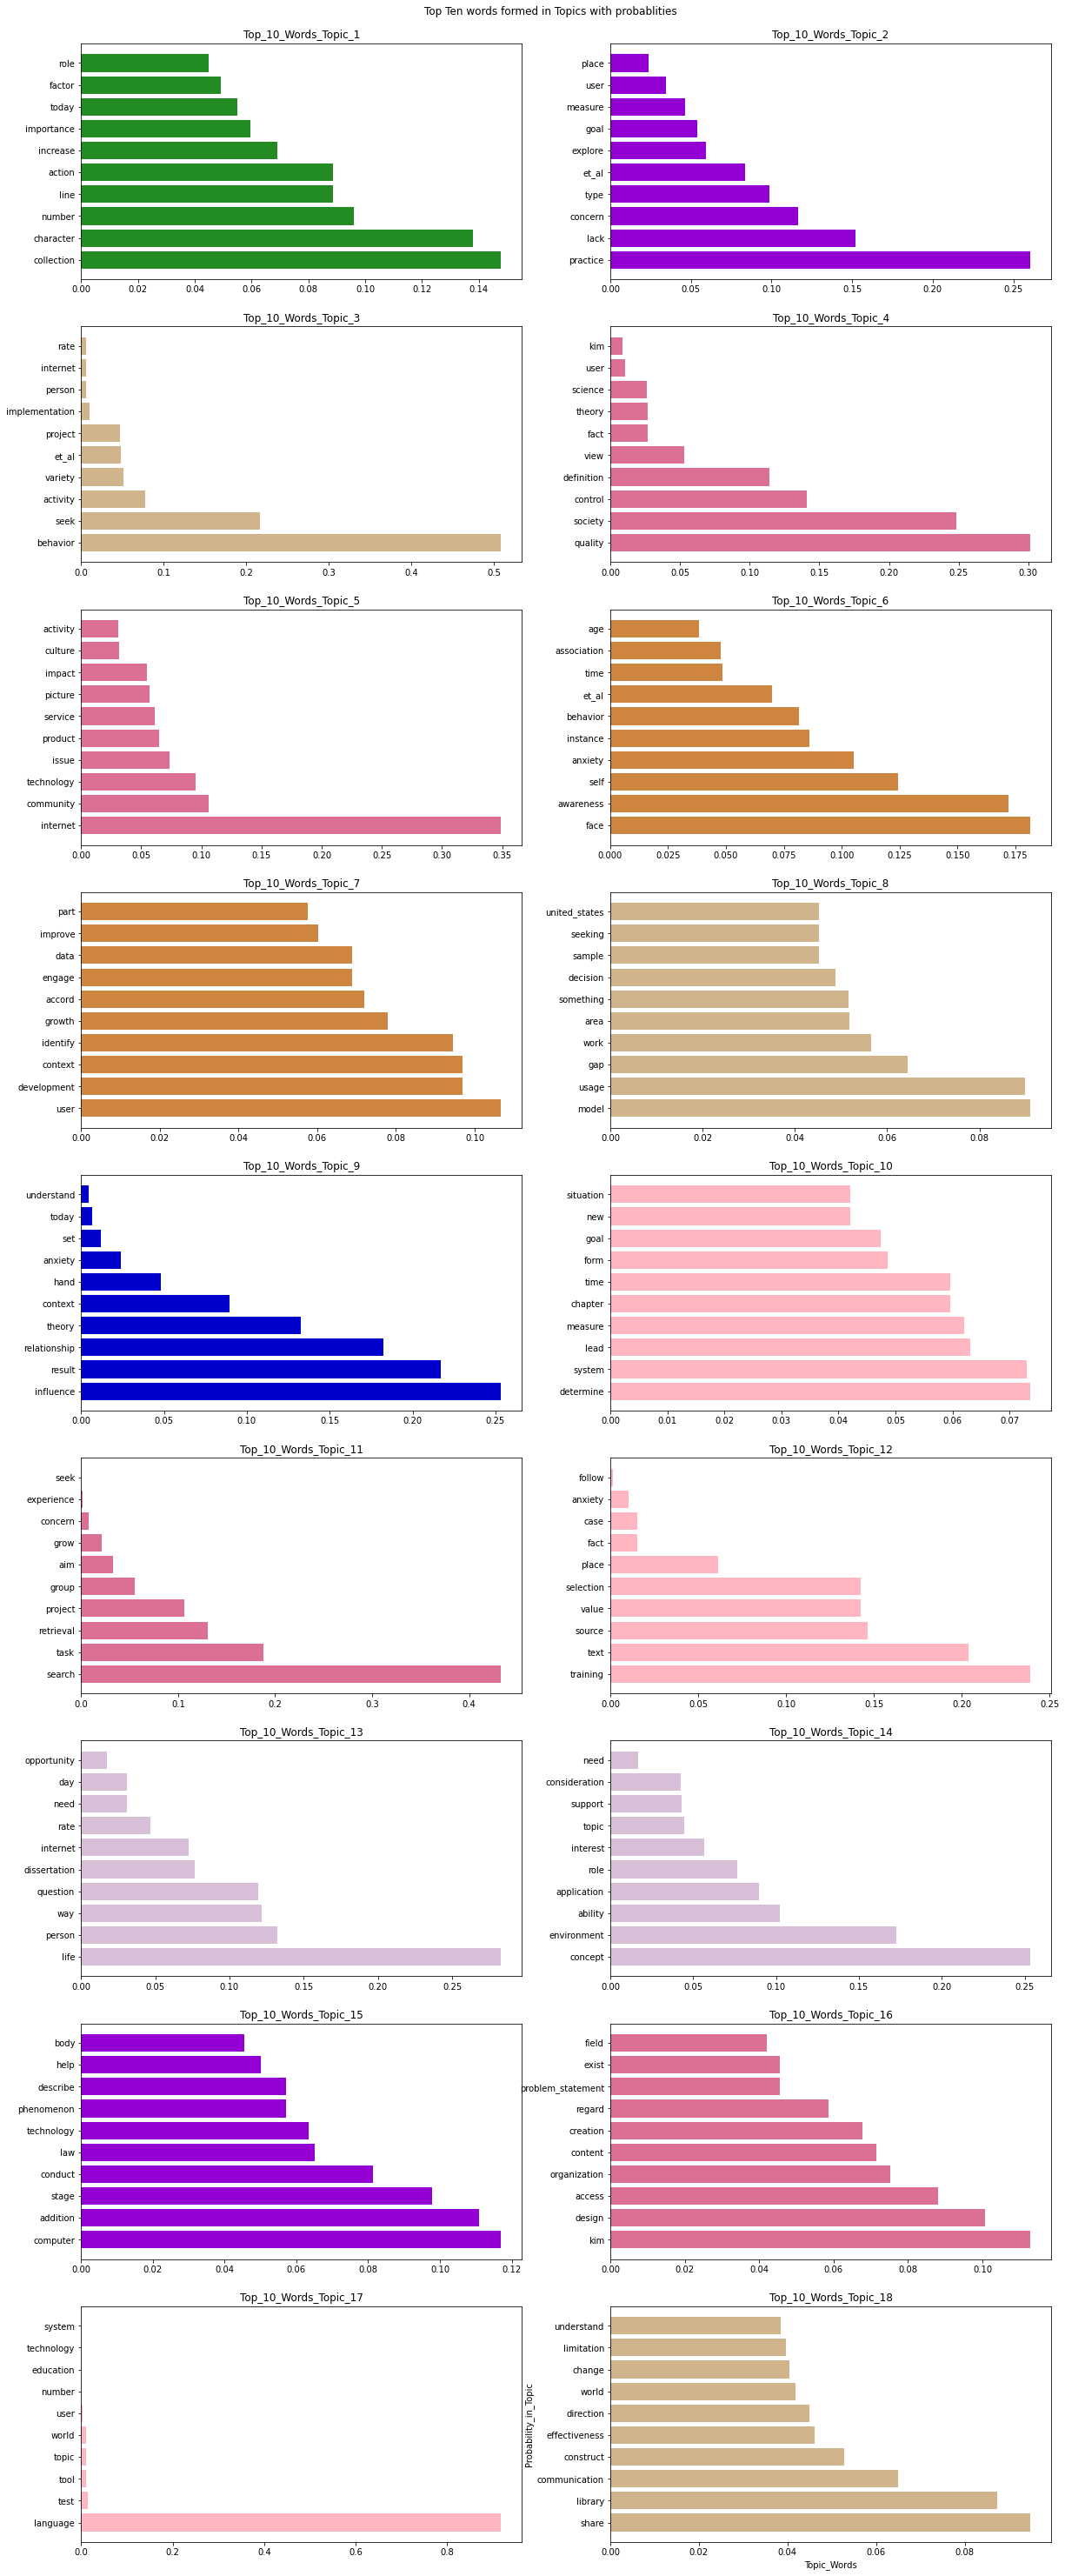

In [ ]:
axis = []
fig, axis = plot.subplots(rows//2, 2,figsize=(20,60))
colors = ['darkviolet','peru','mediumblue','forestgreen','lightpink','olive','thistle','tan','lightseagreen','palevioletred']
for i in range(rows//2):
  x0 = [each[0] for each in topic_words[i+i]]
  y0 = [each[1] for each in topic_words[i+i]]
  axis[i,0].barh(x0,y0,color = colors[random.randint(0,9)])
  axis[i,0].set_title("Top_10_Words_Topic_"+str(i+i+1))
  x1 = [each[0] for each in topic_words[i+i+1]]
  y1 = [each[1] for each in topic_words[i+i+1]]
  axis[i,1].barh(x1,y1,color = colors[random.randint(0,9)]) 
  axis[i,1].set_title("Top_10_Words_Topic_"+str(i+i+2))

fig.suptitle("Top Ten words formed in Topics with probablities",y = 0.8)
fig.subplots_adjust(top=0.79)
plot.xlabel("Topic_Words")
plot.ylabel("Probability_in_Topic")

plot.savefig("Topic_Words_Probabilities.png")
files.download("Topic_Words_Probabilities.png")

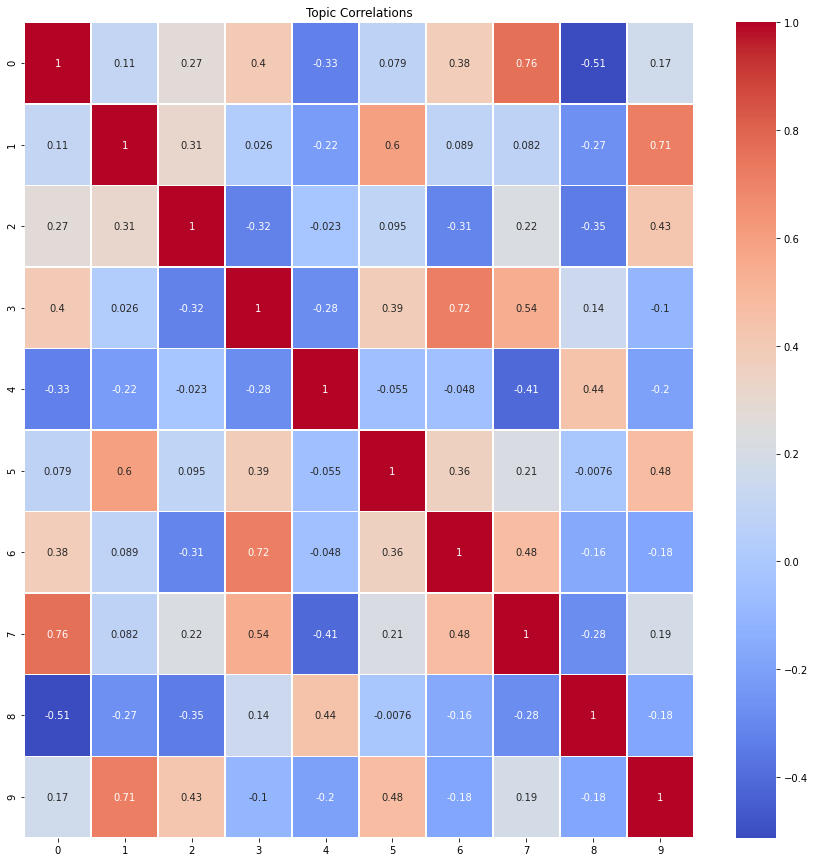

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

plt.figure(figsize = (15,15))
plt.title("Topic Correlations")
plt.xlabel("Topic_id")
plt.ylabel("Topic_id")
sns.heatmap(correlations,cmap='coolwarm',annot = True,linewidth=.5)
plt.savefig("Topic_Correlations.png")
files.download("Topic_Correlations.png")